# Jupyter Data Science Workflow
### From exploratory analysis to reproducible science 
*Naveenan Arjunan*

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [2]:
import os

FREMONT_URL = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'

from urllib.request import urlretrieve

import pandas as pd

urlretrieve(FREMONT_URL,'Fremont.csv')

('Fremont.csv', <http.client.HTTPMessage at 0x116a66390>)

In [24]:
data=pd.read_csv('Fremont.csv',index_col='Date',parse_dates=True).drop(['Fremont Bridge Total'],axis=1)

In [26]:
data.columns=['East','West']

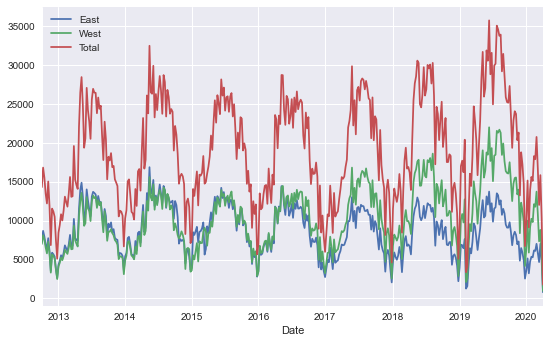

In [37]:
data.resample('W').sum().plot();

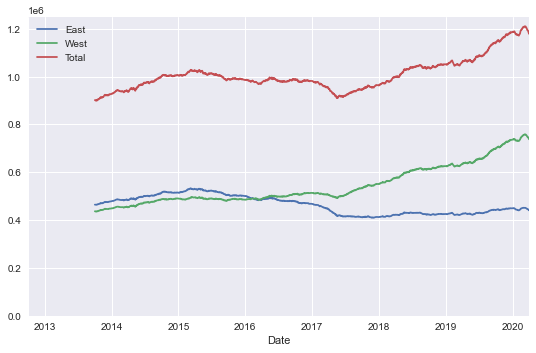

In [38]:
data=data.assign(Total=lambda x:x['East']+x['West'])
ax=data.resample('D').sum().rolling(365).sum().plot();
ax.set_ylim(0,None);

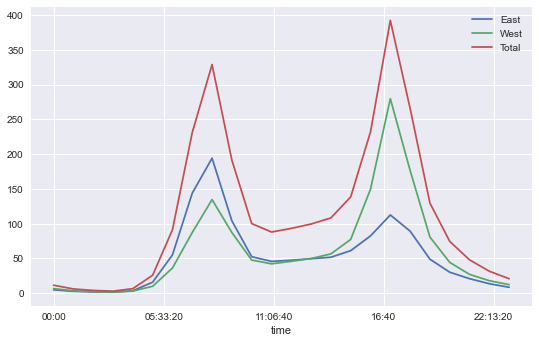

In [39]:
data.groupby(data.index.time).mean().plot();

In [50]:
pivoted=data.pivot_table('Total',index=data.index.time,columns=data.index.date)

pivoted.iloc[:5,:5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


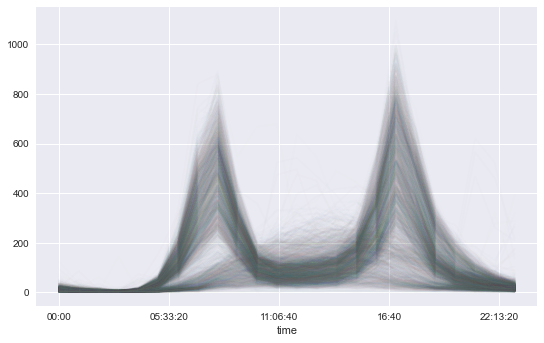

In [52]:
pivoted.plot(legend=False,alpha=0.01);

In [53]:
!pwd

/Users/narjunan/Downloads/Master_data_scientist_ML_Project/do_more_with_twitter_data/examples/timeseries/JupyterWorkflow
